### Stronger temperature–moisture couplings exacerbate the impact of climate warming on global crop yields (Lesk et al. 2021)
### https://www.nature.com/articles/s43016-021-00341-6
### Historical analysis (Figs 1-2, SI Figs 1 and 9)

Steps:
1) load historical t-et and t-p correlations and yield-temp coefficients
2) plot yield-temp coefficients and 2 coupling measures
3) Plot Figure 2, regression of yield sensitivity to temperature on the 2 coupling measures


Note that you will need modify directories to match your local structure
Underlying yield data available from Deepak Ray upon request

In [1]:
from netCDF4 import Dataset
import numpy as np
import pickle
import gzip
from matplotlib import pyplot as plt
import pandas as pd
from datetime import datetime
import statsmodels.formula.api as sm
from scipy.stats.mstats import zscore
import scipy.interpolate
import scipy.stats
from mpl_toolkits.basemap import Basemap
%matplotlib inline 

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

### Step 1:load historical t-et and t-p correlations and yield-temp coefficients


In [2]:
crops=['Maize','Soybean','Wheat','Rice']

sacksDir = '...\\data\\SacksData\\0.5d\\'
sacks = Dataset(sacksDir + '\\Maize.crop.calendar.fill.nc','r')    
lon = sacks['longitude'][:]
lat = sacks['latitude'][:]
lons = sacks['longitude'][:]
lats = sacks['latitude'][:]

In [3]:
#load yield-temp coefs
f = gzip.open('...\\data\\coefs_final_y~t_wrms_v2.dat', 'rb')
coefs = pickle.load(f)
f.close()

#load r(t,p)
f = gzip.open('D:\\data\\compimp_processed\\partial_corr_t-p_wrms_1961-2010.dat', 'rb')
par_corrs = pickle.load(f)
f.close()

#load gldas temp-moisture correl maps
f = gzip.open('D:\\data\\compimp_processed\\gldas_correl_maps\\r-temp-et_wrms_1961-2010.dat', 'rb')
r_temp_et = pickle.load(f)
f.close()

f = gzip.open('D:\\data\\compimp_processed\\gldas_correl_maps\\p-temp-et_wrms_1961-2010.dat', 'rb')
p_temp_et = pickle.load(f)
f.close()



for c in ['Wheat']:
    for k in coefs[c].keys():
        coefs[c][k] = np.flipud(coefs[c][k])

In [4]:
sacksDir = '...\\data\\SacksData\\0.5d\\'
sacks = Dataset(sacksDir + '\\Maize.crop.calendar.fill.nc','r')    
lon = sacks['longitude'][:]
lat = sacks['latitude'][:]
lons = lon
lats = lat

In [5]:
#load Ray cropland extent
areaDir = 'E:\\data\\ray-yield\\version2\\'
cArea = {}
for c in crops:
    aCube = np.empty((360,720,5))
    for i,y in enumerate(range(2009,2014)):
        ds = Dataset(areaDir + c + '_1970to2013\\' + c + '_harvestedArea_' + str(y) + '_ver12b.nc','r' )
        aCube[:,:,i] = np.squeeze(ds['Data'])
    
    cArea[c] = np.flipud(np.mean(aCube,axis=2))



### Step 2: plot yield/temp coeffs and 2 coupling measures

In [6]:
output_final = True
finaloutdir = "J:\\rhc_final\\"

In [9]:
#output source data
datin = {'lons':lonGrid.ravel(),'lats':latGrid.ravel(),
         'rtp':par_corrs['Maize']['r(t,p)'].ravel(),'ptp':par_corrs['Maize']['p(t,p)'].ravel(),
         'rtet':r_temp_et['Maize'].ravel(),'ptet':p_temp_et['Maize'].ravel(),
         'btemp_maize':coefs['Maize']['bstd_temp'].ravel(),'ptemp_maize':coefs['Maize']['p_temp'].ravel(),
         'btemp_soybean':coefs['Soybean']['bstd_temp'].ravel(),'ptemp_soybean':coefs['Soybean']['p_temp'].ravel(),
         'btemp_wheat':coefs['Wheat']['bstd_temp'].ravel(),'ptemp_wheat':coefs['Wheat']['p_temp'].ravel(),
         'btemp_rice':coefs['Rice']['bstd_temp'].ravel(),'ptemp_rice':coefs['Rice']['p_temp'].ravel()}         
         
fig1ef = pd.DataFrame(datin)
fig1ef.to_csv('Fig1data.csv')

NameError: name 'lonGrid' is not defined

C:\Users\HAL 9000\AppData\Local\conda\conda\envs\geo_scipy\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in less
C:\Users\HAL 9000\AppData\Local\conda\conda\envs\geo_scipy\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in less
C:\Users\HAL 9000\AppData\Local\conda\conda\envs\geo_scipy\lib\site-packages\mpl_toolkits\basemap\__init__.py:3360: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\HAL 9000\AppData\Local\conda\conda\envs\geo_scipy\lib\site-packages\mpl_toolkits\basemap\__init__.py:3399: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
C:\Users\HAL 9000\AppData\Local\conda\conda\envs\geo_scipy\lib\site-packages\mpl_toolkits\basemap\__init__.py:5038: MatplotlibDeprecationWarning: The is_scalar function was deprecated in version 

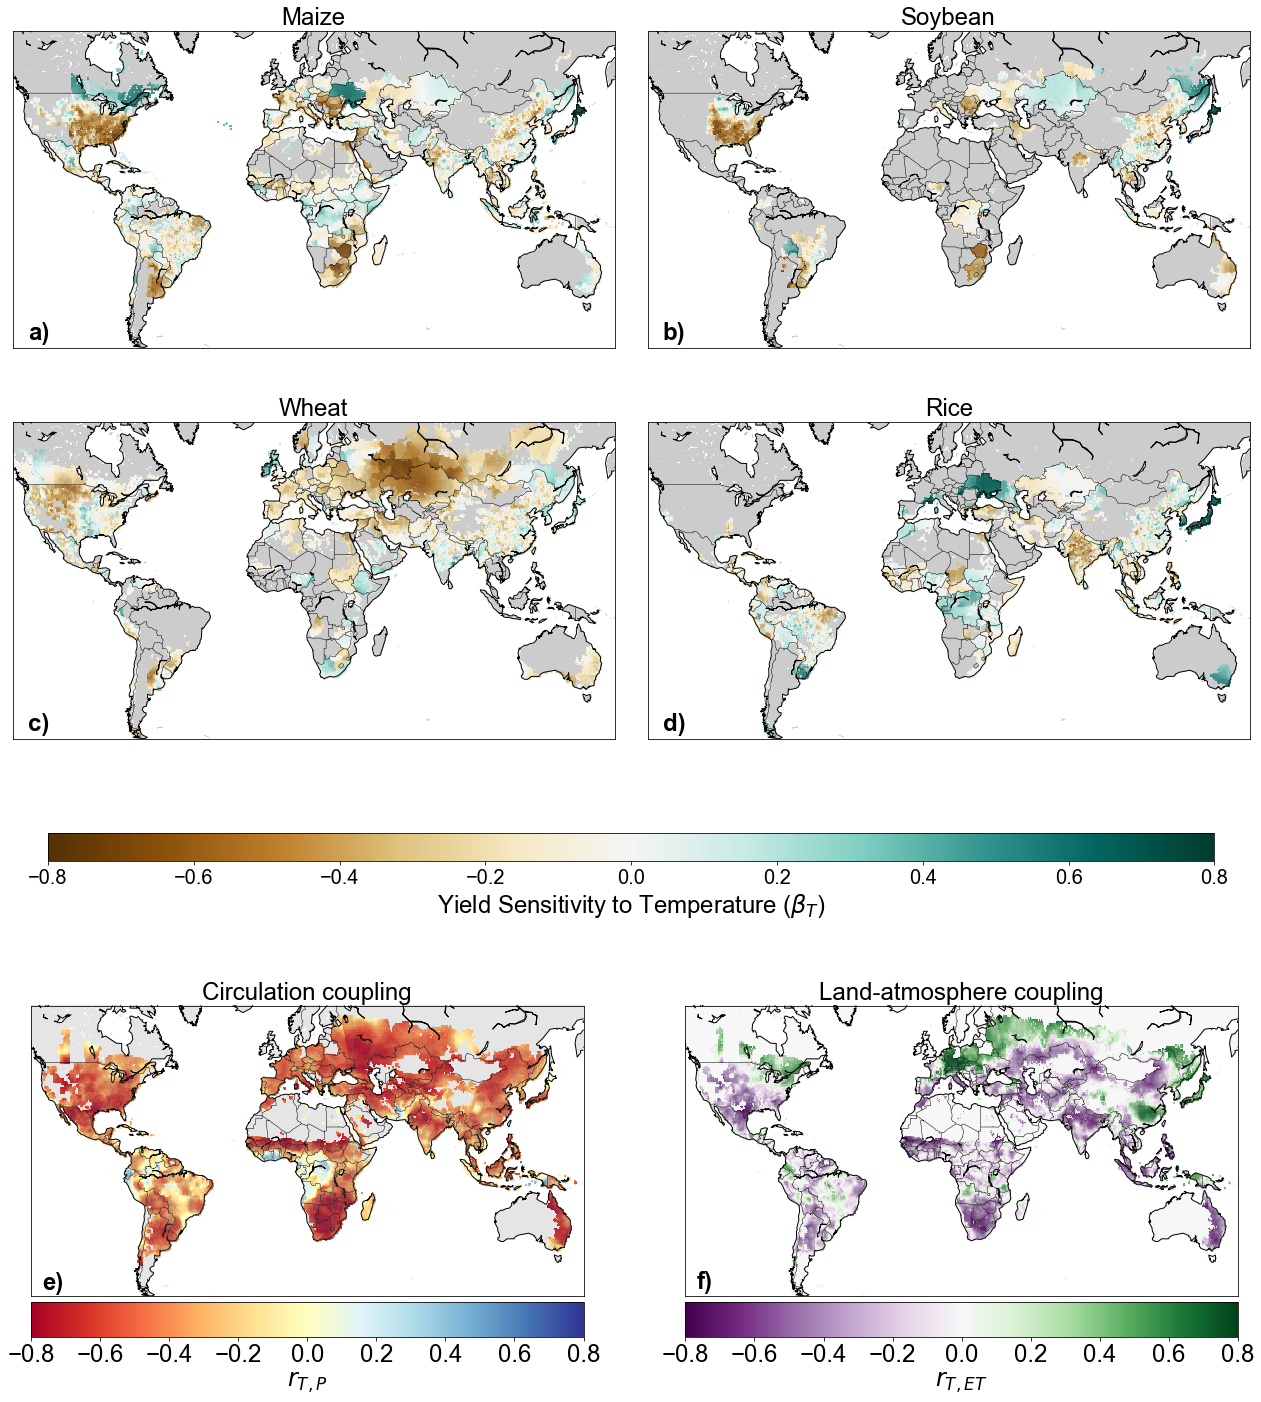

In [44]:
### plot Figure 1
plt.rcParams['font.size'] = 24
plt.rcParams['font.sans-serif'] = "Arial"

lonGrid,latGrid=np.meshgrid(lons,lats)

pThrsh = 0.1
aThresh = 0.01

fig,axs = plt.subplots(2,2)
fig.set_size_inches(18,20)

labs = ['a)','b)','c)','d)']#,'e)','f)']

for i,ax in enumerate(axs.reshape(-1)[0:4]):
    
    
    if i < 4:
        c = crops[i]
        var = coefs[c]['bstd_temp']
        pvals = coefs[c]['p_temp']
        cmap='BrBG'
    
    elif i == 4:
        c='Maize'
        f = gzip.open('..\\data\\partial_corr_t-p_wrms_1961-2010.dat', 'rb')
        par_corrs = pickle.load(f)
        f.close()
        
        v='(t,p)'
        var = par_corrs[c]['r'+v]
        pvals = par_corrs[c]['p'+v]
        
    #mask low area
    var[cArea[c]<aThresh] = np.nan
    pvals[cArea[c]<aThresh] = np.nan
    
    #latGrid = latGrid[::-1,:]
    m = Basemap(projection='merc',llcrnrlat=-55,urcrnrlat=65,llcrnrlon=-130,urcrnrlon=160,ax=ax)
    map=m.pcolor(lonGrid,latGrid,var,cmap=cmap,latlon=True,vmin=-0.8,vmax=0.8) 
    m.drawcoastlines();m.drawcountries();m.drawlsmask()
    #m.colorbar(map,ax=ax)

    lonStpl,latStpl = m(lonGrid[pvals<pThrsh],latGrid[pvals<pThrsh]); 
    m.plot(lonStpl,latStpl,color='gray',marker='|',linestyle='',markersize=3,alpha=0.1)

    ax.set_title(c,fontsize=24)
    ax.text(0.025,0.025,labs[i],transform=ax.transAxes,fontsize=24,fontweight='bold')
    
plt.tight_layout()
fig.subplots_adjust(bottom=0.30)
cbar_ax = fig.add_axes([0.05, 0.38, 0.9, 0.02])
cb=fig.colorbar(map, cax=cbar_ax,orientation='horizontal')
cb.ax.tick_params(labelsize=20)
cb.set_label(r'Yield Sensitivity to Temperature ($\beta_T$)',fontsize=24)

ax1 = fig.add_axes([0.015,0.05,0.47,0.23])
ax2 = fig.add_axes([0.52,0.05,0.47,0.23])

###

c='Maize'

f = gzip.open('..\\data\\partial_corr_t-p_wrms_1961-2008.dat', 'rb')
par_corrs = pickle.load(f)
f.close()

v='(t,p)'
var1 = par_corrs[c]['r'+v]
p1 = par_corrs[c]['p'+v]
pThrsh = 0.1

lonGrid,latGrid=np.meshgrid(lons,lats)

m = Basemap(projection='merc',llcrnrlat=-55,urcrnrlat=65,llcrnrlon=-130,urcrnrlon=160,ax=ax1)
map = m.pcolormesh(lonGrid,latGrid,var1,cmap='RdYlBu',latlon=True,vmin=-0.8,vmax=0.8) 
m.drawcoastlines();m.drawcountries();
cb=m.colorbar(map,ax=ax1,location='bottom',size='12%')
m.drawlsmask(land_color='0.9')

ax1.text(0.02,0.02,'e)',transform=ax1.transAxes,fontsize=24,fontweight='bold')

cb.set_label(r'$r_{T,P}$',fontsize=24)

lonStpl,latStpl = m(lonGrid[p1<pThrsh],latGrid[p1<pThrsh]); 
m.plot(lonStpl,latStpl,color='gray',marker='|',linestyle='',markersize=3,alpha=0.1)

ax1.set_title('Circulation coupling',fontsize=24)

var2 = r_temp_et[c]*~np.isnan(var1)
p2 = p_temp_et[c]
p2[np.isnan(par_corrs[c]['r'+v])] = np.nan

m = Basemap(projection='merc',llcrnrlat=-55,urcrnrlat=65,llcrnrlon=-130,urcrnrlon=160,ax=ax2)
map = m.pcolormesh(lonGrid,latGrid,var2,cmap='PRGn',latlon=True,vmin=-0.8,vmax=0.8) 
m.drawcoastlines();m.drawcountries();
cb=m.colorbar(map,ax=ax2,location='bottom',size='12%')
m.drawlsmask(land_color='0.9')

ax2.text(0.02,0.025,'f)',transform=ax2.transAxes,fontsize=24,fontweight='bold')

lonStpl,latStpl = m(lonGrid[p2<pThrsh],latGrid[p2<pThrsh]); 
m.plot(lonStpl,latStpl,color='gray',marker='|',linestyle='',markersize=3,alpha=0.1)

ax2.set_title('Land-atmosphere coupling',fontsize=24)
cb.set_label(r'$r_{T,ET}$',fontsize=24)


plt.subplots_adjust(bottom=0.44,hspace=0.005)


plt.savefig('J:\\rhc_final\\Fig12.pdf')

### SI Figure 1

In [9]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors

cdict = {'purple':colors.to_rgba('purple'),'linen':colors.to_rgba('linen'),'green':colors.to_rgba('green')}
cmapx = LinearSegmentedColormap('cmapx',cdict)

C:\Users\HAL 9000\AppData\Local\conda\conda\envs\geo_scipy\lib\site-packages\mpl_toolkits\basemap\__init__.py:3360: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\HAL 9000\AppData\Local\conda\conda\envs\geo_scipy\lib\site-packages\mpl_toolkits\basemap\__init__.py:3399: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
C:\Users\HAL 9000\AppData\Local\conda\conda\envs\geo_scipy\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in less
C:\Users\HAL 9000\AppData\Local\conda\conda\envs\geo_scipy\lib\site-packages\mpl_toolkits\basemap\__init__.py:3274: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\HAL 9000\AppData\Local\conda\conda\envs\geo_scipy\lib\site-packages\mpl_toolkits\basemap\__init__.py:3283: MatplotlibDepreca

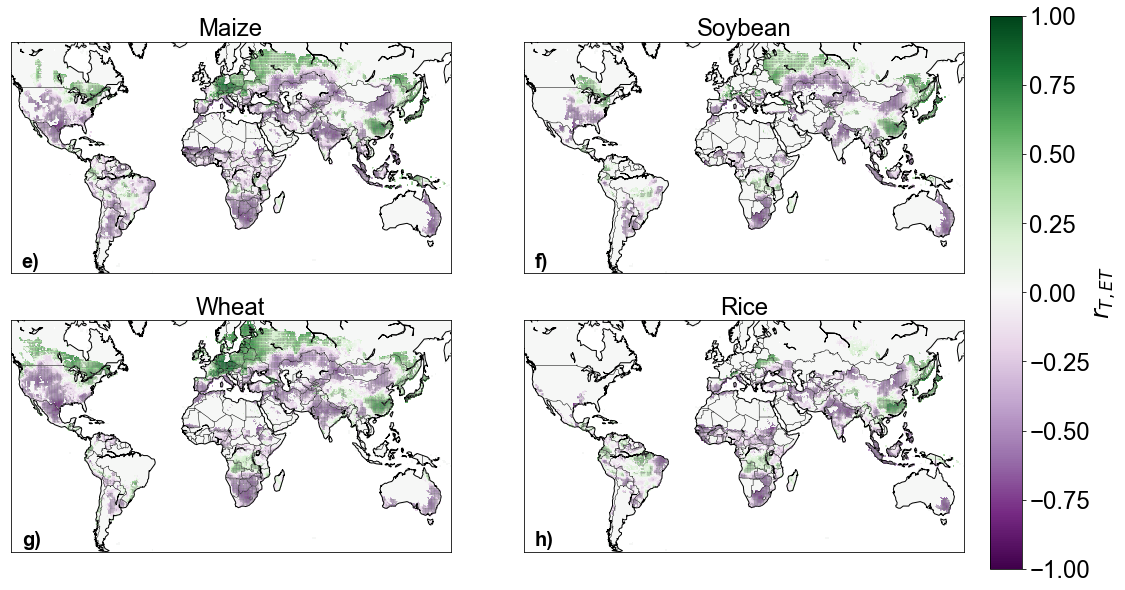

In [19]:
labs = ['e)','f)','g)','h)']#,'e)','f)']

lonGrid,latGrid=np.meshgrid(lons,lats)

pThrsh = 0.1

fig,axs = plt.subplots(2,2)
fig.set_size_inches(15,8)

for i,ax in enumerate(axs.reshape(-1)):
    c = crops[i]
    var1 =  par_corrs[c]['r(t,p)']
    var = r_temp_et[c]*~np.isnan(var1)
    pvals = p_temp_et[c]*~np.isnan(var1)
    pvals[np.isnan(par_corrs[c]['r(t,p)'])] = np.nan
    
    #latGrid = latGrid[::-1,:]
    m = Basemap(projection='merc',llcrnrlat=-55,urcrnrlat=65,llcrnrlon=-130,urcrnrlon=160,ax=ax)
    map=m.pcolor(lonGrid,latGrid,var,cmap='PRGn',latlon=True,vmin=-1,vmax=1) 
    m.drawcoastlines();m.drawcountries();
    #m.colorbar(map,ax=ax)

    lonStpl,latStpl = m(lonGrid[pvals<pThrsh],latGrid[pvals<pThrsh]); 
    m.plot(lonStpl,latStpl,color='gray',marker='|',linestyle='',markersize=.3)
    
    ax.set_title(c,fontsize=24)
    ax.text(0.025,0.025,labs[i],transform=ax.transAxes,fontsize=20,fontweight='bold')

plt.tight_layout()
fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.95, 0.01, 0.03, 0.96])
cb=fig.colorbar(map, cax=cbar_ax)
cb.ax.tick_params(labelsize=24)
cb.set_label(r'$r_{T,ET}$',fontsize=24)

    

#fig.suptitle(fontsize=20)
plt.savefig('rtet_wpval_all_crops.png')


C:\Users\HAL 9000\AppData\Local\conda\conda\envs\geo_scipy\lib\site-packages\mpl_toolkits\basemap\__init__.py:3360: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\HAL 9000\AppData\Local\conda\conda\envs\geo_scipy\lib\site-packages\mpl_toolkits\basemap\__init__.py:3399: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
C:\Users\HAL 9000\AppData\Local\conda\conda\envs\geo_scipy\lib\site-packages\mpl_toolkits\basemap\__init__.py:5038: MatplotlibDeprecationWarning: The is_scalar function was deprecated in version 2.1.
  elif masked and is_scalar(masked):
C:\Users\HAL 9000\AppData\Local\conda\conda\envs\geo_scipy\lib\site-packages\mpl_toolkits\basemap\__init__.py:3310: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\HAL 9000\AppData\Local\conda\conda\envs\

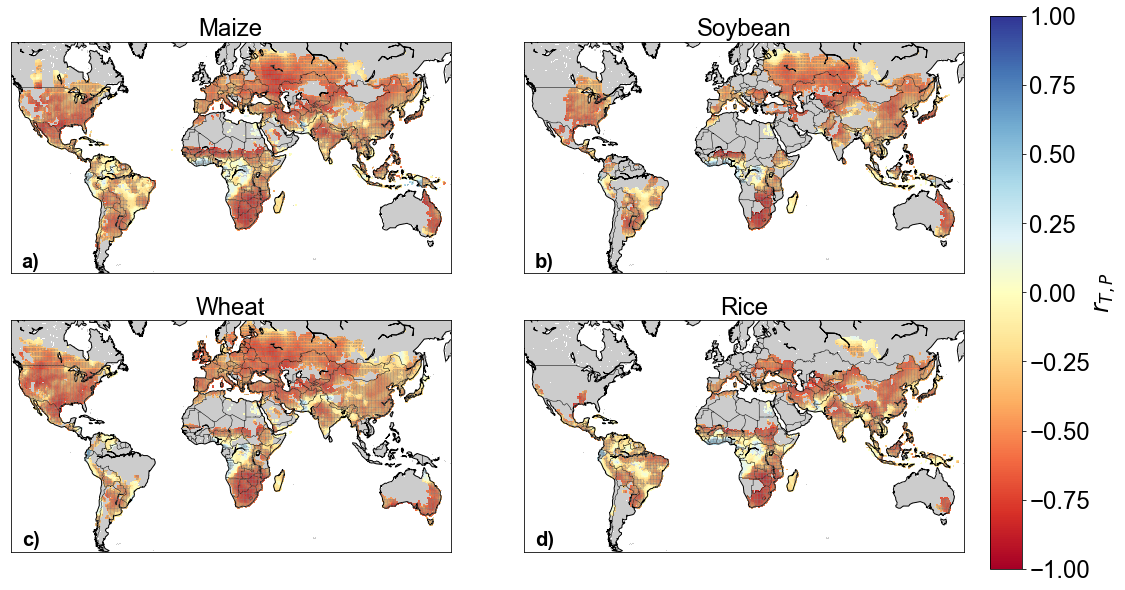

In [20]:

labs = ['a)','b)','c)','d)']#,'e)','f)']
lonGrid,latGrid=np.meshgrid(lons,lats)

pThrsh = 0.1

fig,axs = plt.subplots(2,2)
fig.set_size_inches(15,8)

for i,ax in enumerate(axs.reshape(-1)):
    c = crops[i]
    var = par_corrs[c]['r(t,p)']
    pvals = par_corrs[c]['p(t,p)']

    #latGrid = latGrid[::-1,:]
    m = Basemap(projection='merc',llcrnrlat=-55,urcrnrlat=65,llcrnrlon=-130,urcrnrlon=160,ax=ax)
    map=m.pcolor(lonGrid,latGrid,var,cmap='RdYlBu',latlon=True,vmin=-1,vmax=1) 
    m.drawcoastlines();m.drawcountries();m.drawlsmask()
    #m.colorbar(map,ax=ax)

    lonStpl,latStpl = m(lonGrid[pvals<pThrsh],latGrid[pvals<pThrsh]); 
    m.plot(lonStpl,latStpl,color='gray',marker='|',linestyle='',markersize=.3)
    
    ax.set_title(c,fontsize=24)
    ax.text(0.025,0.025,labs[i],transform=ax.transAxes,fontsize=20,fontweight='bold')

plt.tight_layout()
fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.95, 0.01, 0.03, 0.96])
cb=fig.colorbar(map, cax=cbar_ax)
cb.ax.tick_params(labelsize=24)
cb.set_label(r'$r_{T,P}$',fontsize=24)

    

#fig.suptitle(fontsize=20)
plt.savefig('rtp_wpval_all_crops.png')

***
### Step 3: Plot Figure 2, regression of yield sensitivity to temperature on the 2 coupling measures

In [8]:
#print sample sizes
model_2couplings = {}
pThresh=0.1
for c in crops:
    dat = np.array([np.reshape(par_corrs[c]['r(t,p)'],(360*720)),np.reshape(coefs[c]['bstd_temp'],(360*720)),
                        np.reshape(coefs[c]['p_temp'],(360*720)),np.reshape(r_temp_et[c],(360*720)),cArea[c].ravel()])

    dat[:,dat[2,:]>pThresh] = np.nan 
    dat[:,dat[4,:]<0.1] = np.nan 
    dat[:,dat[3,:]<-0.6] = np.nan 
    print(c)
    mask = ~np.isnan(dat[2,:]) & ~np.isnan(dat[4,:])
    print(np.nansum(mask))
    df = pd.DataFrame(np.rot90(dat[:,mask]),columns=['rtp','btemp','ptemp','rtet','area'])
    model_2couplings[c] = sm.ols(formula = 'rtp ~ rtet', data=df).fit()



Maize
5038
Soybean
2641
Wheat
5880
Rice
3069


C:\Users\HAL 9000\AppData\Local\conda\conda\envs\geo_scipy\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
C:\Users\HAL 9000\AppData\Local\conda\conda\envs\geo_scipy\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()
C:\Users\HAL 9000\AppData\Local\conda\conda\envs\geo_scipy\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':


In [11]:
#run multiple regressions
model = {}
pThresh=0.1
for c in crops:
    dat = np.array([np.reshape(par_corrs[c]['r(t,p)'],(360*720)),np.reshape(coefs[c]['bstd_temp'],(360*720)),
                        np.reshape(coefs[c]['p_temp'],(360*720)),np.reshape(r_temp_et[c],(360*720)),cArea[c].ravel()])

    dat[:,dat[2,:]>pThresh] = np.nan 
    dat[:,dat[4,:]<0.1] = np.nan 
    mask = ~np.isnan(dat[2,:]) & ~np.isnan(dat[4,:])
    df = pd.DataFrame(np.rot90(dat[:,mask]),columns=['rtp','btemp','ptemp','rtet','area'])
    model[c] = sm.ols(formula = 'btemp ~ rtet + rtp', data=df).fit()

model['Soybean'].summary()

C:\Users\HAL 9000\AppData\Local\conda\conda\envs\geo_scipy\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
C:\Users\HAL 9000\AppData\Local\conda\conda\envs\geo_scipy\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  btemp   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     1002.
Date:                Wed, 23 Jun 2021   Prob (F-statistic):          1.48e-323
Time:                        16:07:31   Log-Likelihood:                -184.99
No. Observations:                2612   AIC:                             376.0
Df Residuals:                    2609   BIC:                             393.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0190      0.019     -0.994      0.320      -0.056       0.018
rtet           0.5762      0.017     33.708      0.000       0.543       0.610
rtp            0.2340      0.037      6.299      0.000       0.161       0.307
==============================================================================
Omnibus:                       70.606   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.512
Skew:                           0.411   Prob(JB):                     4.01e-17
Kurtosis:                       2.860   Cond. No.                         9.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
r = [0.26,0.43,0.04,0.1]
aet = [0.45,0.57,0.05,0.4]
ap = [0.37,0.25,0.24,-0.23]

In [22]:
# computing VIF's shows collinearity between 2 predictors not worrying (VIF << 10)
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = model['Maize'].model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

[7.5939073305415139, 1.278506052414623, 1.2785060524146235]

C:\Users\HAL 9000\AppData\Local\conda\conda\envs\geo_scipy\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
C:\Users\HAL 9000\AppData\Local\conda\conda\envs\geo_scipy\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app


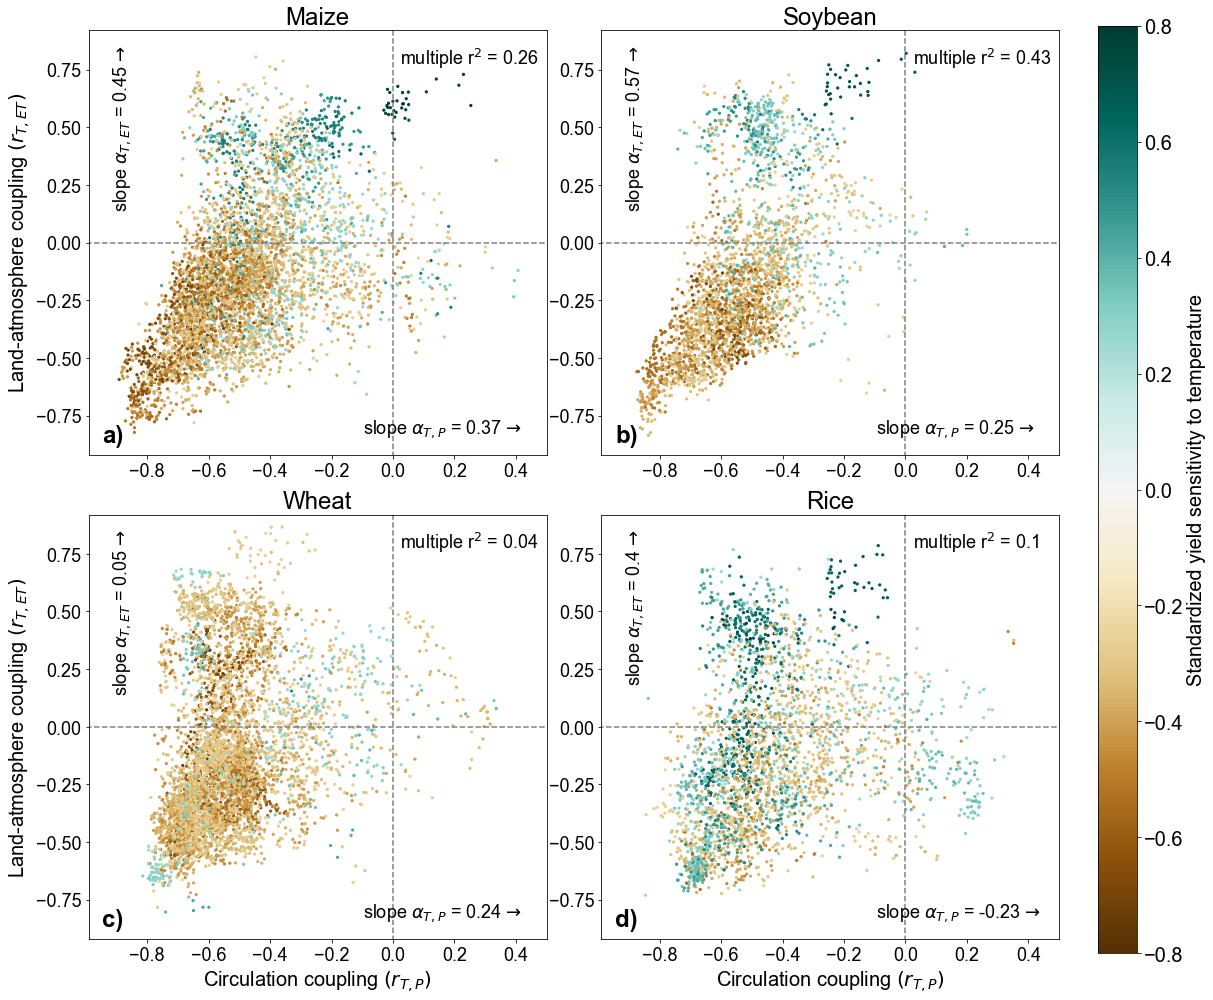

In [30]:
#plot figure 2
stat_annotations = True

labs = ['a)','b)','c)','d)']

fig,axs = plt.subplots(2,2)
fig.set_size_inches(18,14)


for i,ax in enumerate(axs.reshape(-1)):
    c = crops[i]
    dat = np.array([np.reshape(par_corrs[c]['r(t,p)'],(360*720)),np.reshape(coefs[c]['bstd_temp'],(360*720)),
                    np.reshape(coefs[c]['p_temp'],(360*720)),np.reshape(r_temp_et[c],(360*720)),cArea[c].ravel()])
                                                                                                                            
    dat[:,dat[2,:]>pThresh] = np.nan 
    dat[:,dat[4,:]<0.0001] = np.nan 
    mask = ~np.isnan(dat[0,:]) & ~np.isnan(dat[3,:])
    
    datin = {}
    datin['rtp_'+c] = dat[0,mask]
    datin['rtet_'+c] = dat[3,mask]
    datin['btemp_'+c] = dat[1,mask]
    fig2 = pd.DataFrame(datin)
    fig2.to_csv(finaloutdir+c+'fig2.csv')
    
    map=ax.scatter(dat[0,mask],dat[3,mask],c=dat[1,mask],cmap='BrBG',s=5,vmin=-0.8,vmax=0.8)
    if (i == 0) | (i == 2): ax.set_ylabel(r'Land-atmosphere coupling $(r_{T,ET})$',fontsize=20)
    if i > 1: ax.set_xlabel(r'Circulation coupling $(r_{T,P})$',fontsize=20)
    ax.hlines(0,-1,1,linestyle='--',color='gray')
    ax.vlines(0,-1,1,linestyle='--',color='gray')
    ax.set_ylim((-0.92,0.92))
    ax.set_xlim((-0.99,0.5))
    ax.set_title(c,fontsize=24)
    ax.text(0.03,0.03,labs[i],transform=ax.transAxes,fontsize=24,fontweight='bold')
    ax.tick_params(labelsize=18)

    #stat annotations
    if stat_annotations: 
        rstr = r'multiple r$^2$ = ' + str(r[i])
        ax.text(0.68,0.92,rstr,transform=ax.transAxes,fontsize=18)
        b1str = r'slope $\alpha_{T,ET}$ = ' +  str(aet[i]) + u' $\u2192$'  #r'$\beta$
        ax.text(0.05,0.93,b1str,transform=ax.transAxes,fontsize=18,rotation=90)
        b2str = r'slope $\alpha_{T,P}$ = ' +  str(ap[i]) + u' $\u2192$'
        ax.text(0.6,0.05,b2str,transform=ax.transAxes,fontsize=18,rotation=0)




plt.tight_layout()

fig.subplots_adjust(right=0.82)
cbar_ax = fig.add_axes([0.85, 0.05, 0.03, 0.92])
cb=fig.colorbar(map, cax=cbar_ax)
cb.ax.tick_params(labelsize=20)
cb.set_label(r'Standardized yield sensitivity to temperature',fontsize=20)

if output_final:
    plt.savefig(finaloutdir + 'fig2.pdf',dpi=100)